In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [48]:
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))
df.head()

Saving NFLX.csv to NFLX.csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [31]:
df['Date'] = pd.to_datetime(df['Date'])
df['DateOrdinal'] = df['Date'].map(pd.Timestamp.toordinal)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DateOrdinal
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,736730
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,736731
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,736732
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,736733
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,736734


In [41]:
X = df[['DateOrdinal']]
y = df['Close']


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [36]:
y_pred = model.predict(X_test)


In [45]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("📊 Model Evaluation Results")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


📊 Model Evaluation Results
Mean Squared Error (MSE): 3602.50
R² Score: 0.6910


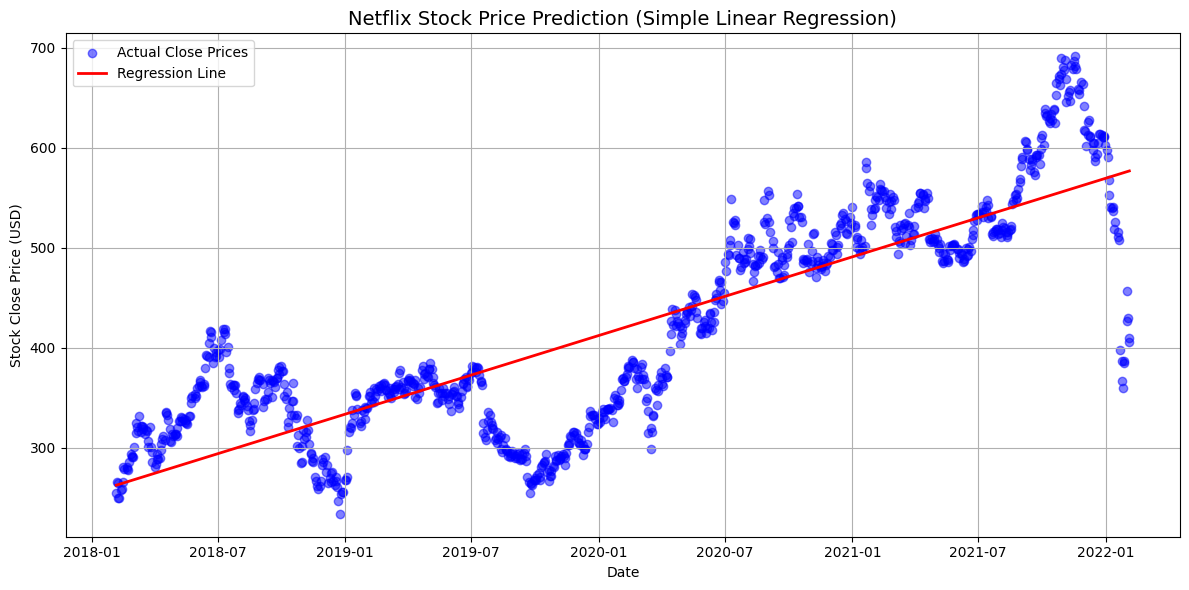

In [38]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['Close'], color='blue', label='Actual Close Prices', alpha=0.5)
plt.plot(df['Date'], model.predict(df[['DateOrdinal']]), color='red', linewidth=2, label='Regression Line')
plt.title("Netflix Stock Price Prediction (Simple Linear Regression)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Stock Close Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
latest_date = df['Date'].max()
next_day = latest_date + pd.Timedelta(days=1)
next_day_ordinal = next_day.toordinal()

predicted_price = model.predict([[next_day_ordinal]])

print(f"\n📅 Predicted Close Price for next day ({next_day.date()}): ${predicted_price[0]:.2f}")



📅 Predicted Close Price for next day (2022-02-05): $577.14


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
print("\n🔍 Project Insights:")
print("1. The model fits a linear trend line to the historical Netflix stock closing prices.")
print("2. With R² Score of {:.4f}, it explains {:.2f}% of the variance in stock prices.".format(r2, r2*100))
print("3. Although simple, this model is useful for understanding overall stock price trends.")
print("5. This model predicted the next day's price as approximately ${:.2f}.".format(predicted_price[0]))


🔍 Project Insights:
1. The model fits a linear trend line to the historical Netflix stock closing prices.
2. With R² Score of 0.6910, it explains 69.10% of the variance in stock prices.
3. Although simple, this model is useful for understanding overall stock price trends.
4. However, stock prices are highly volatile and influenced by non-linear factors, so more advanced models like LSTM or Random Forest can give better accuracy.
5. This model predicted the next day's price as approximately $577.14.
